In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
dflist =[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_csv(os.path.join(dirname, filename),header = None)  # Read the CSV file into a DataFrame
        dflist.append(df)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [58]:
#HEART  Electrocardiogram(ECG) 
df_ptbdb_abnormal = dflist[0]
df_ptbdb_normal = dflist[1]
df_mitbih_test = dflist[2]
df_mitbih_train = dflist[3]

In [59]:
df_mitbih_train_train = df_mitbih_train.iloc[:,:-1]
df_mitbih_train_target = df_mitbih_train.iloc[:,-1]

In [60]:
df_mitbih_train_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df_mitbih_train.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
      dtype='int64', length=188)

# Data Exploratory


In [62]:
df_mitbih_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [63]:
df_mitbih_train.iloc[10000:10030]

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10000,0.926606,0.559633,0.348624,0.073394,0.000000,0.050459,0.110092,0.123853,0.155963,0.137615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001,0.990050,0.937811,0.507463,0.189055,0.101990,0.106965,0.064677,0.064677,0.039801,0.042289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10002,1.000000,0.915110,0.494058,0.140917,0.181664,0.224109,0.210526,0.210526,0.210526,0.190153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10003,0.995575,0.817109,0.393805,0.082596,0.000000,0.091445,0.135693,0.106195,0.100295,0.100295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10004,1.000000,0.670139,0.031250,0.069444,0.083333,0.097222,0.083333,0.083333,0.076389,0.069444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10005,0.650558,0.092937,0.037175,0.249071,0.319703,0.382900,0.394052,0.371747,0.371747,0.394052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10006,1.000000,0.698473,0.000000,0.061069,0.062977,0.089695,0.137405,0.129771,0.131679,0.133588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10007,1.000000,0.957507,0.722380,0.470255,0.277620,0.334278,0.396601,0.470255,0.481586,0.464589,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008,1.000000,0.902959,0.480473,0.053254,0.240237,0.273373,0.184615,0.182249,0.194083,0.190533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10009,0.969256,0.915858,0.380259,0.000000,0.144013,0.258900,0.283172,0.304207,0.299353,0.299353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


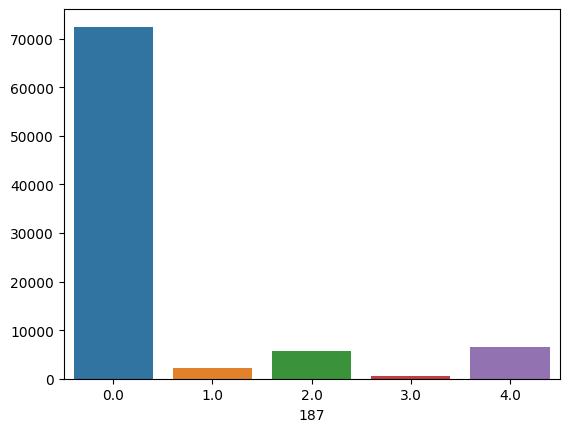

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = df_mitbih_train[187].value_counts().index,y = df_mitbih_train[187].value_counts().values)
plt.savefig("Class_ratio.png", dpi=300)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


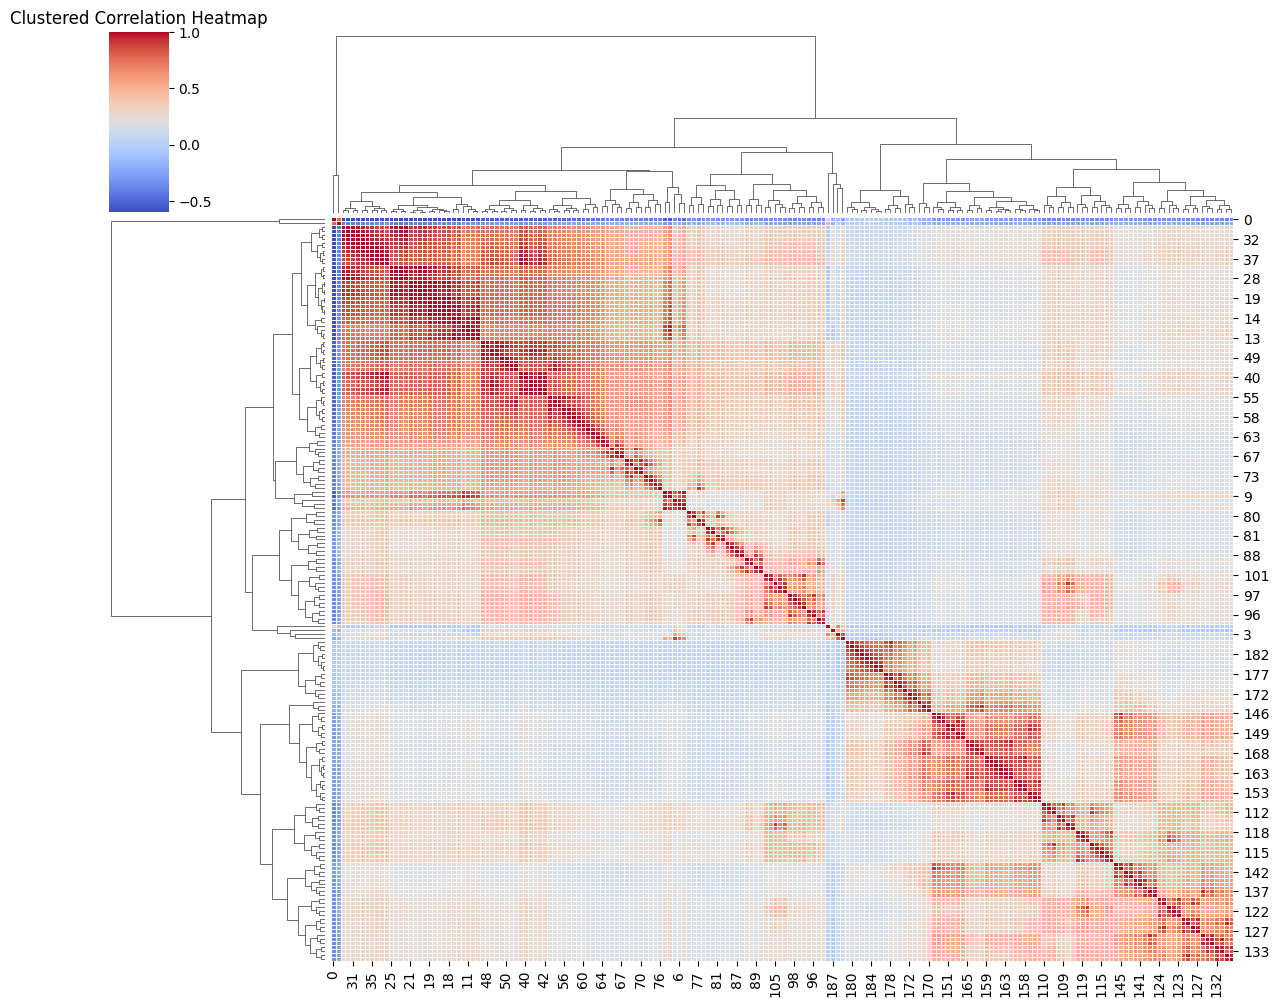

In [93]:
corr_matrix = df_mitbih_train.corr()
sns.clustermap(corr_matrix, cmap="coolwarm", figsize=(12, 10), linewidths=0.5)
plt.title("Clustered Correlation Heatmap")
plt.savefig("Correlation_heatmap.png", dpi=300)
plt.show()


In [65]:
for column in df_mitbih_train.columns:
    if df_mitbih_train[column].nunique() == 5:
        print(column)

187


In [66]:
# Class Imbalance
import random
# /20 class 0
drop_list =[]
for index in df_mitbih_train.index:
    if df_mitbih_train[187][index] == 0:
        if random.random() < 0.4:
            continue
        else :
            drop_list.append(index)
dropped_df_mitbih_train = df_mitbih_train.drop(drop_list)

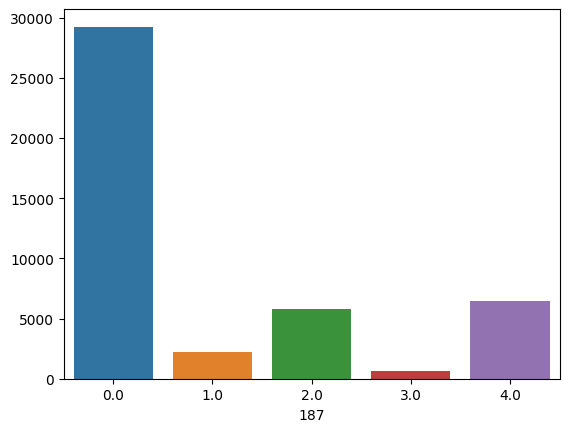

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = dropped_df_mitbih_train[187].value_counts().index,y = dropped_df_mitbih_train[187].value_counts().values)
plt.savefig("Undersample_class_ratio.png", dpi=300)

In [68]:
dropped_df_mitbih_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,44338.000000,44338.000000,44338.000000,44338.000000,44338.000000,44338.000000,44338.000000,44338.000000,44338.000000,44338.000000,...,44338.000000,44338.000000,44338.000000,44338.000000,44338.000000,44338.000000,44338.000000,44338.000000,44338.000000,44338.000000
mean,0.865530,0.738102,0.443453,0.259424,0.237382,0.240109,0.231500,0.223053,0.214466,0.205577,...,0.007199,0.006743,0.006301,0.005838,0.005526,0.005240,0.004902,0.004540,0.004390,0.934774
std,0.264434,0.242853,0.237210,0.233282,0.205702,0.193875,0.194833,0.187994,0.176516,0.169835,...,0.052955,0.051328,0.049692,0.047801,0.046223,0.045016,0.043422,0.041362,0.040363,1.466079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.889848,0.633787,0.263406,0.061905,0.090675,0.096491,0.080214,0.071883,0.071713,0.074510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.982747,0.818599,0.450151,0.202561,0.169302,0.178652,0.163154,0.169043,0.172348,0.161169,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910277,0.600858,0.408265,0.321429,0.334888,0.345839,0.333333,0.309524,0.290323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [69]:
dropped_df_mitbih_train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.996086,0.694716,0.336595,0.238748,0.268102,0.191781,0.174168,0.164384,0.187867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


# Handling corr and preprocessing

In [70]:
# Correlation Checking
train_df = dropped_df_mitbih_train
test_df = df_mitbih_test
'''
high_corr = train_df.corr()[(train_df.corr() > 0.7) | (train_df.corr() < -0.7)]
high_corr = high_corr.dropna(how="all").dropna(axis=1, how="all")
'''

'\nhigh_corr = train_df.corr()[(train_df.corr() > 0.7) | (train_df.corr() < -0.7)]\nhigh_corr = high_corr.dropna(how="all").dropna(axis=1, how="all")\n'

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_df)
scaled_test = scaler.fit_transform(test_df)

In [72]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [73]:
# Too many features, need a better way
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_df.iloc[:,:-1])
scaler2 = StandardScaler()
scaled_data2 = scaler.fit_transform(test_df.iloc[:,:-1])
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_features = pca.fit_transform(scaled_data)
X_test_pca = pca.transform(scaled_data2)
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca_features.shape[1])])
pca_df_test = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

Using LightBGM

In [74]:
!pip install lightgbm

In [75]:
import lightgbm as lgb
import random
from sklearn.model_selection import train_test_split
X = pca_df  # Features
y = train_df.iloc[:, -1]  # Target variable
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True) 
X_test = pca_df_test
y_test = test_df.iloc[:,-1]
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)
val_data = lgb.Dataset(x_val,label = y_val,reference=train_data)

In [76]:
y_train

45688    0.0
61577    0.0
75254    2.0
54370    0.0
12595    0.0
        ... 
15498    0.0
27841    0.0
81374    4.0
2127     0.0
39060    0.0
Name: 187, Length: 26602, dtype: float64

In [118]:
import warnings
warnings.filterwarnings("ignore")
import lightgbm as lgb
import numpy as np
from sklearn.metrics import classification_report

params = {
    "objective": "multiclass",  
    "num_class": 5,  
    "metric": "multi_logloss",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    'min_data_in_leaf': 20,
    'max_bin': 255,
    'bagging_fraction': 0.8,
    'feature_fraction': 0.8,
    'verbose':-1
}

learning_rates = [0.01, 0.05, 0.1]
n_estimators_list = [100, 200, 300]
max_depths = [3, 5, 7]

best_model = None
best_accuracy = 0

for lr in learning_rates:
    for n_est in n_estimators_list:
        for depth in max_depths:
            print(f"Training model with learning_rate={lr}, n_estimators={n_est}, max_depth={depth}")

            # Update parameters
            params["learning_rate"] = lr
            params["max_depth"] = depth  # ✅ Valid in params

            model = lgb.train(params, train_data, valid_sets=[val_data], num_boost_round=n_est)

            y_pred_prob = model.predict(X_test)
            y_pred = np.argmax(y_pred_prob, axis=1)

            report = classification_report(y_test, y_pred, output_dict=True)
            accuracy = report["accuracy"]

            print(f"Accuracy: {accuracy:.4f}\n")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model

best_model.save_model("best_lightgbm_model.txt")
print(f"Best model saved with accuracy: {best_accuracy:.4f}")


Training model with learning_rate=0.01, n_estimators=100, max_depth=3
Accuracy: 0.9137

Training model with learning_rate=0.01, n_estimators=100, max_depth=5
Accuracy: 0.9389

Training model with learning_rate=0.01, n_estimators=100, max_depth=7
Accuracy: 0.9488

Training model with learning_rate=0.01, n_estimators=200, max_depth=3
Accuracy: 0.9271

Training model with learning_rate=0.01, n_estimators=200, max_depth=5
Accuracy: 0.9493

Training model with learning_rate=0.01, n_estimators=200, max_depth=7
Accuracy: 0.9569

Training model with learning_rate=0.01, n_estimators=300, max_depth=3
Accuracy: 0.9328

Training model with learning_rate=0.01, n_estimators=300, max_depth=5
Accuracy: 0.9531

Training model with learning_rate=0.01, n_estimators=300, max_depth=7
Accuracy: 0.9587

Training model with learning_rate=0.05, n_estimators=100, max_depth=3
Accuracy: 0.9411

Training model with learning_rate=0.05, n_estimators=100, max_depth=5
Accuracy: 0.9582

Training model with learning_rat

In [119]:
from sklearn.metrics import classification_report, roc_auc_score
# Predict probabilities
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1) 
y_pred

array([0, 0, 0, ..., 4, 4, 4])

In [98]:
len(y_pred)

21892

In [80]:
len(y_test)

21892

In [117]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy:.4f}")
confusionmatrix = confusion_matrix(y_pred,y_test)
print(f"{confusionmatrix}")

Accuracy: 0.9184
[[17213   222   292    37   133]
 [  157   312    37     0     0]
 [  332    14  1020     8    32]
 [  251     6    56   117     0]
 [  165     2    43     0  1443]]


Accuracy: 0.9718
Confusion Matrix:
 [[17942    36   113     8    19]
 [  187   348    18     0     3]
 [   79     4  1342    17     6]
 [   42     0    30    90     0]
 [   37     1    17     0  1553]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18118
         1.0       0.89      0.63      0.74       556
         2.0       0.88      0.93      0.90      1448
         3.0       0.78      0.56      0.65       162
         4.0       0.98      0.97      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.90      0.81      0.85     21892
weighted avg       0.97      0.97      0.97     21892



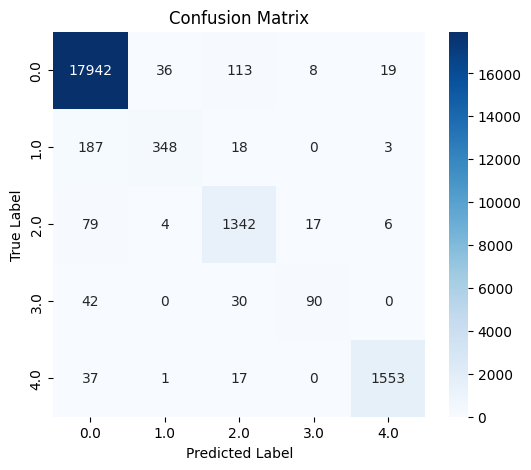

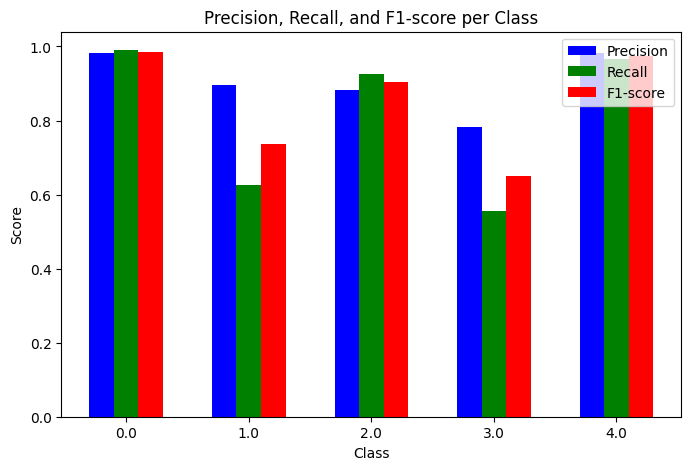

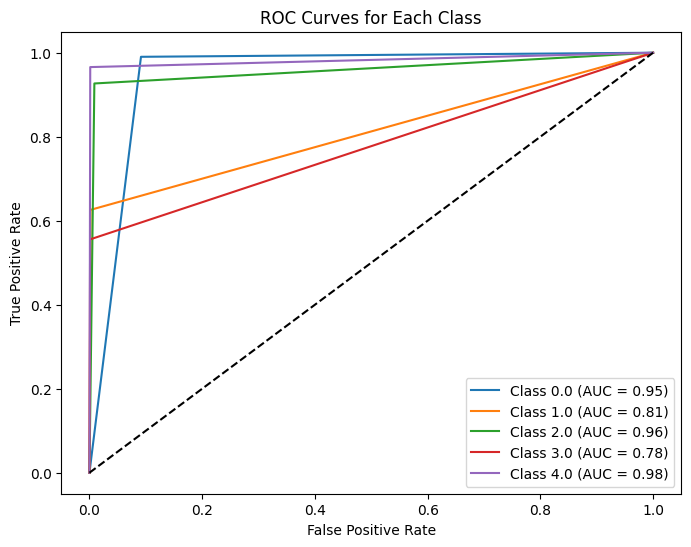

Macro-Averaged AUC Score: 0.8960


In [120]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_recall_fscore_support, roc_curve, auc
)
import numpy as np

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

classes = np.unique(y_test)
x = np.arange(len(classes))

plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, precision, width=0.2, label="Precision", color="blue")
plt.bar(x, recall, width=0.2, label="Recall", color="green")
plt.bar(x + 0.2, f1_score, width=0.2, label="F1-score", color="red")
plt.xticks(ticks=x, labels=classes)
plt.xlabel("Class")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-score per Class")
plt.legend()
plt.show()
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test_bin = label_binarize(y_test, classes=classes)
y_pred_bin = label_binarize(y_pred, classes=classes)

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Each Class")
plt.legend()
plt.show()
auc_score = roc_auc_score(y_test_bin, y_pred_bin, average="macro")
print(f"Macro-Averaged AUC Score: {auc_score:.4f}")


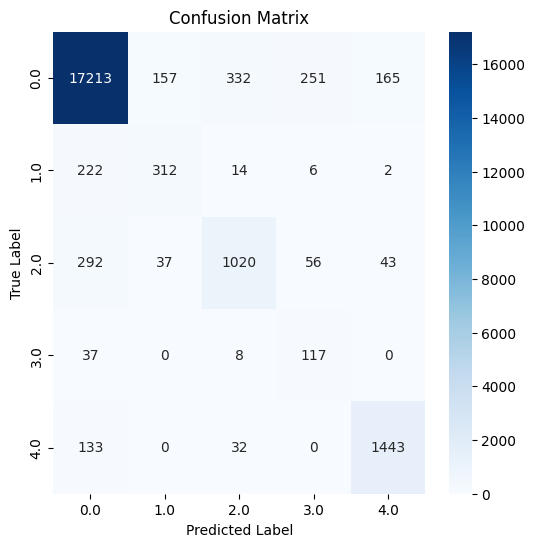

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix2.png", dpi=300)  # Saves with high resolution
plt.show()


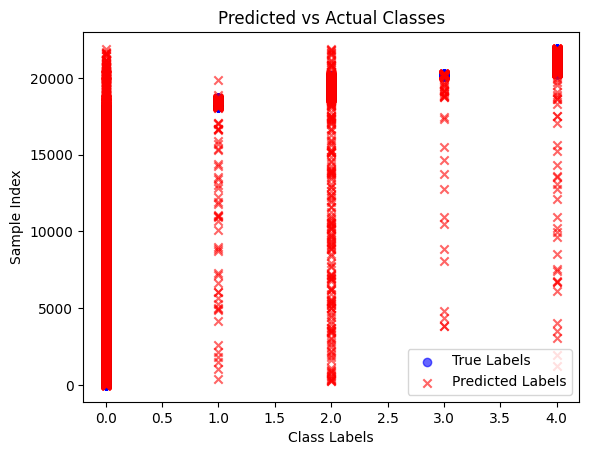

In [83]:
import matplotlib.pyplot as plt

# Plot actual vs predicted labels with index on y-axis
plt.scatter(y_test, range(len(y_test)), label="True Labels", marker="o", alpha=0.6, color="blue")
plt.scatter(y_pred, range(len(y_pred)), label="Predicted Labels", marker="x", alpha=0.6, color="red")

plt.xlabel("Class Labels")
plt.ylabel("Sample Index")  # Index of each sample
plt.title("Predicted vs Actual Classes")
plt.legend()
plt.show()


In [84]:
y_test

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: 187, Length: 21892, dtype: float64